In [1]:
%matplotlib widget
# from IPython.display import display, Math, SVG
import matplotlib.pyplot as plt

import numpy as np
from utils import read_pv3_heatdata_txt, get_settling_time

In [4]:
# Reading the data from the PV3 files 
file_path = "data/experimental/24_03_08/09_18_22/heatData/"
# file_path = "data/experimental/24_03_12/11_48_31/heatData/"
bottom_stack_file = "Bottom Heat Controller worker.txt"
upper_stack_file = "Top Heat Controller worker.txt"
cart_names = ["CT_" + str(i//4+1) + str((i%4) + 1) for i in range(16)]

data, headers = read_pv3_heatdata_txt(file_path + bottom_stack_file)

t_bot = (data['Time']) / 1e3 # conversion to seconds 
setpoint_bot = np.array(data['Target'])
stack_temperature_bot = np.array(data['Stack'])

cart_temperature_bot = []
for cart_name in cart_names:
    cart_temperature_bot.append(data[cart_name])
cart_temperature_bot = np.array(cart_temperature_bot)

data, _ = read_pv3_heatdata_txt(file_path + upper_stack_file)

t_up = (data['Time']) / 1e3 # conversion to seconds 
setpoint_up = np.array(data['Target'])
stack_temperature_up = np.array(data['Stack'])

cart_temperature_up = []
for cart_name in cart_names:
    cart_temperature_up.append(data[cart_name])
cart_temperature_up = np.array(cart_temperature_up)

t0 = np.min([t_up[0], t_bot[0]])
t_bot = t_bot - t0
t_up = t_up - t0

t = {"bottom": t_bot, "upper": t_up}
stack_temperature = {"bottom": stack_temperature_bot, "upper": stack_temperature_up}
setpoint = {"bottom": setpoint_bot, "upper": setpoint_up}
cart_temperature = {"bottom": cart_temperature_bot, "upper": cart_temperature_up}
stacks = ["bottom", "upper"]


Text(0.5, 0.98, 'Heating phase')

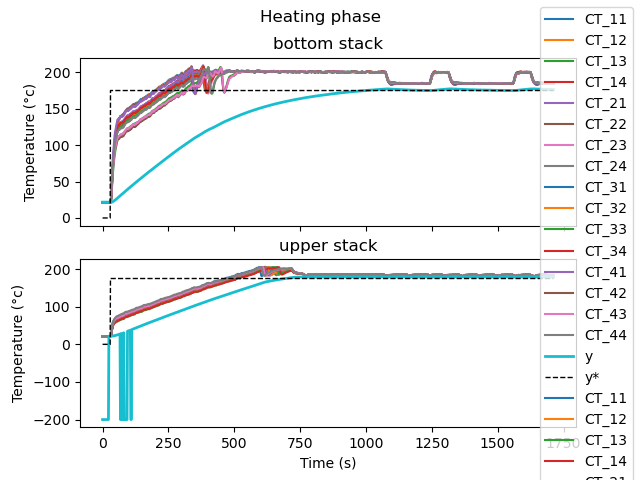

In [5]:
# Plotting the data
color_list = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
fig, ax = plt.subplots(2,1,sharex=True)
ax[1].set_xlabel('Time (s)') 
for ii, stack in enumerate(stacks):
    ax[ii].set_ylabel('Temperature (°c)')
    ax[ii].set_title(stack + " stack")
    for i, cart_t in enumerate(cart_temperature[stack]):
        ax[ii].plot(t[stack], cart_t, color=color_list[np.mod(i,8)], label=cart_names[i])
    ax[ii].plot(t[stack], stack_temperature[stack], color=color_list[9], label="y", linewidth=2)
    ax[ii].plot(t[stack], setpoint[stack], color="black", linestyle="dashed", label="y*", linewidth=1)
fig.legend()
fig.suptitle('Heating phase')

In [13]:
# Reading the data from the PV3 files 
file_path = "data/experimental/24_03_08/09_46_54/heatData/"
bottom_stack_file = "Bottom Heat Controller worker.txt"
upper_stack_file = "Top Heat Controller worker.txt"
cart_names = ["CT_" + str(i//4+1) + str((i%4) + 1) for i in range(16)]

data, headers = read_pv3_heatdata_txt(file_path + bottom_stack_file)

t_bot = (data['Time']) / 1e3 # conversion to seconds 
setpoint_bot = np.array(data['Target'])
stack_temperature_bot = np.array(data['Stack'])

cart_temperature_bot = []
for cart_name in cart_names:
    cart_temperature_bot.append(data[cart_name])
cart_temperature_bot = np.array(cart_temperature_bot)

data, _ = read_pv3_heatdata_txt(file_path + upper_stack_file)

t_up = (data['Time']) / 1e3 # conversion to seconds 
setpoint_up = np.array(data['Target'])
stack_temperature_up = np.array(data['Stack'])

cart_temperature_up = []
for cart_name in cart_names:
    cart_temperature_up.append(data[cart_name])
cart_temperature_up = np.array(cart_temperature_up)

t0 = np.min([t_up[0], t_bot[0]])
t_bot = t_bot - t0
t_up = t_up - t0

t = {"bottom": t_bot, "upper": t_up}
stack_temperature = {"bottom": stack_temperature_bot, "upper": stack_temperature_up}
setpoint = {"bottom": setpoint_bot, "upper": setpoint_up}
cart_temperature = {"bottom": cart_temperature_bot, "upper": cart_temperature_up}
stacks = ["bottom", "upper"]

Text(0.5, 0.98, 'Cooling phase')

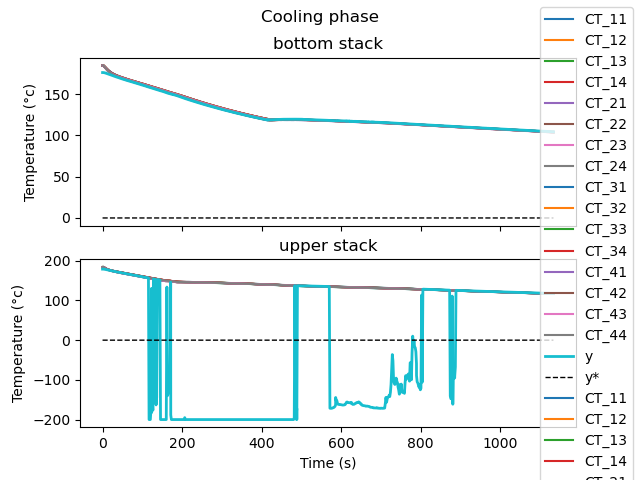

In [17]:
# Plotting the data
color_list = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
fig, ax = plt.subplots(2,1,sharex=True)
ax[1].set_xlabel('Time (s)') 
for ii, stack in enumerate(stacks):
    ax[ii].set_ylabel('Temperature (°c)')
    ax[ii].set_title(stack + " stack")
    for i, cart_t in enumerate(cart_temperature[stack]):
        ax[ii].plot(t[stack], cart_t, color=color_list[np.mod(i,8)], label=cart_names[i])
    ax[ii].plot(t[stack], stack_temperature[stack], color=color_list[9], label="y", linewidth=2)
    ax[ii].plot(t[stack], setpoint[stack], color="black", linestyle="dashed", label="y*", linewidth=1)
fig.legend()
fig.suptitle('Cooling phase')